In [8]:
import seaborn as sns 
sns.set()

from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
from orbit.utils.dataset import load_iclaims
from orbit.eda import eda_plot

In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
df = load_iclaims()
df['week'] = pd.to_datetime(df['week'])

In [45]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,651215,1.183973,0.720140,1.119669,1144.979980,18.13
1,2010-01-10,825891,1.183973,0.814896,1.178599,1136.030029,17.91
2,2010-01-17,659173,1.203382,0.739091,1.119669,1091.760010,27.31
3,2010-01-24,507651,1.164564,0.814896,1.107883,1073.869995,24.62
4,2010-01-31,538617,1.086926,0.776993,1.072525,1066.189941,26.11


# time series heat map

plot exported


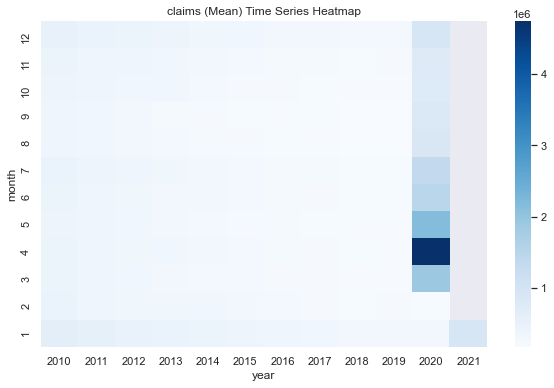

In [46]:
eda_plot.ts_heatmap(df = df, date_col = 'week', value_col='claims', export_fig=True)

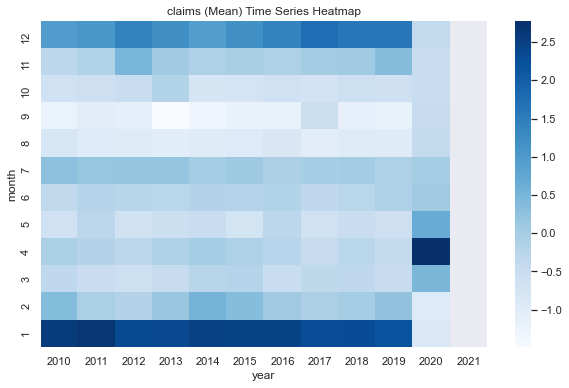

In [47]:
eda_plot.ts_heatmap(df = df, date_col = 'week', value_col='claims', normalization=True)

# correlation heatmap

plot exported


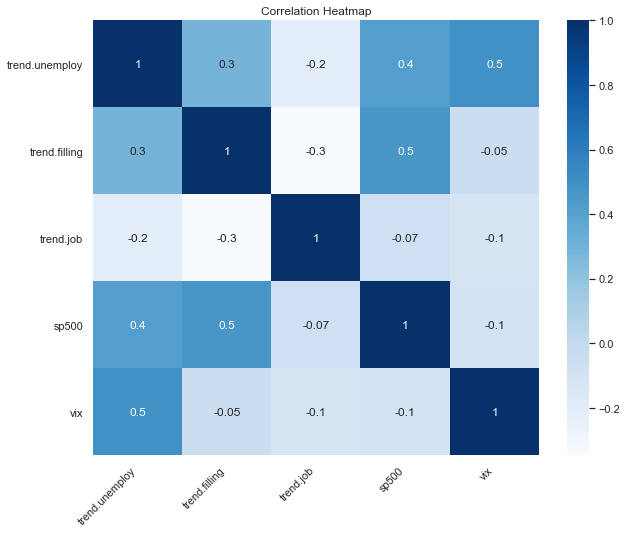

In [48]:
var_list = ['trend.unemploy', 'trend.filling', 'trend.job',
       'sp500', 'vix']
eda_plot.correlation_heatmap(df, var_list = var_list, fig_width=10, fig_height=8, export_fig=True)

# Year over Year Outcome vs Events Time Series Plot

In [49]:
holiday = [['12/25/18', 'h_christmas'], ['12/25/19', 'h_christmas'], 
           ['12/25/20', 'h_christmas'], ['11/22/18',	'h_thanksgiving'], 
           ['11/28/19', 'h_thanksgiving'], ['11/26/20', 'h_thanksgiving'],
           ['7/4/18', 'h_independence'], ['7/4/19', 'h_independence'], 
           ['7/4/20', 'h_independence']]

holiday_df = pd.DataFrame(holiday,columns=['week', 'holiday_name'])
holiday_df['week'] = pd.to_datetime(holiday_df['week'])

plot_exported


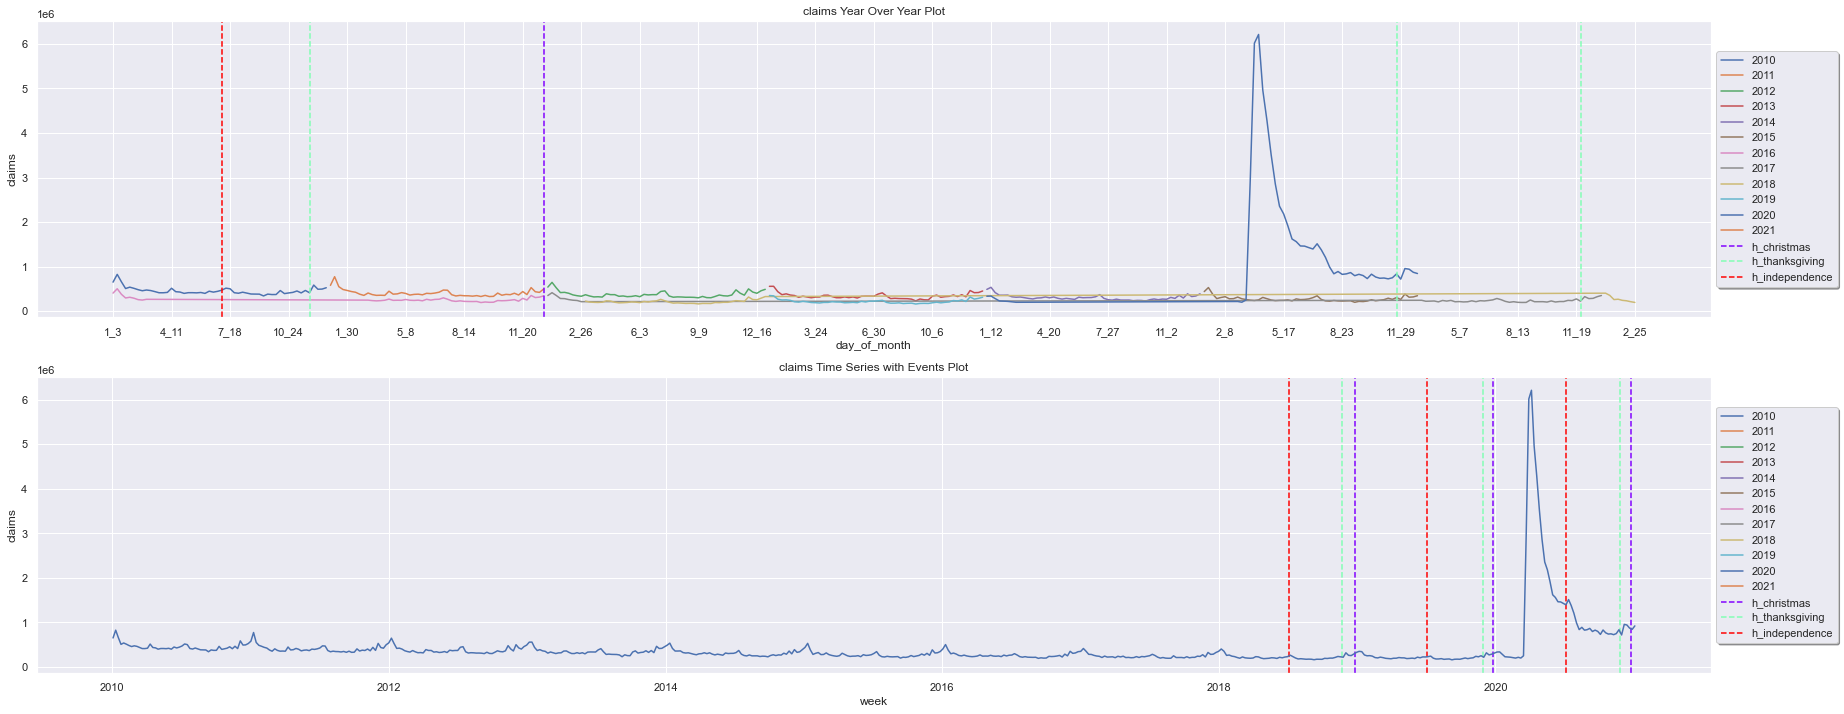

In [50]:
eda_plot.year_over_year_ts_plot(df=df, date_col='week', outcome='claims', event_df=holiday_df, event_col = 'holiday_name', export_fig=True)

# Dual Axis Time Series Plot 

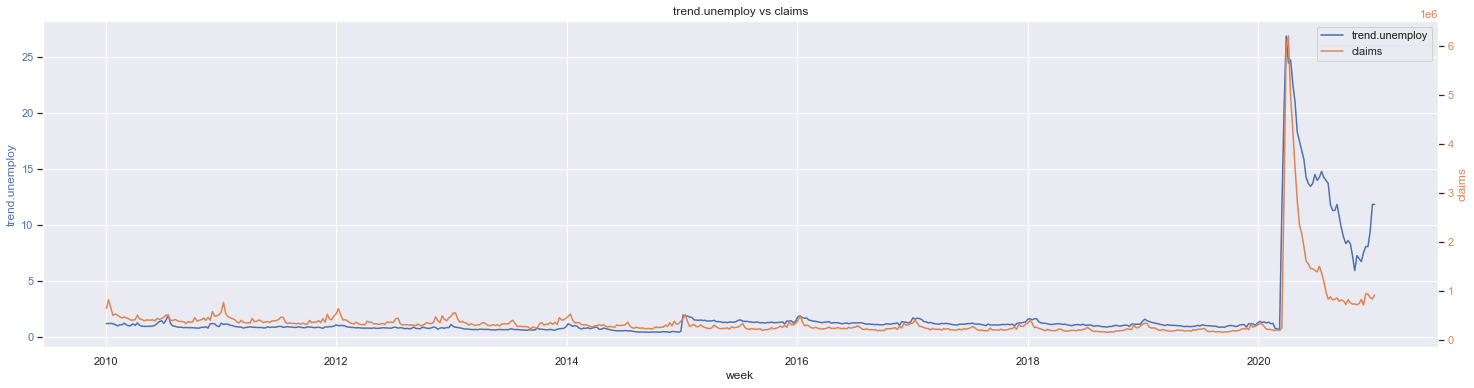

In [51]:
eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week')

# Wrap Plots for Quick Glance of Data Pattern

In [52]:
var_list=['week', 'trend.unemploy', 'trend.filling', 'trend.job',
       'sp500', 'vix']   
df[var_list].melt(id_vars = ['week'])

,week,variable,value
0,2010-01-03,trend.unemploy,1.183973
1,2010-01-10,trend.unemploy,1.183973
2,2010-01-17,trend.unemploy,1.203382
3,2010-01-24,trend.unemploy,1.164564
4,2010-01-31,trend.unemploy,1.086926
...,...,...,...
2870,2020-12-06,vix,23.310000
2871,2020-12-13,vix,21.570000
2872,2020-12-20,vix,21.530000
2873,2020-12-27,vix,22.750000


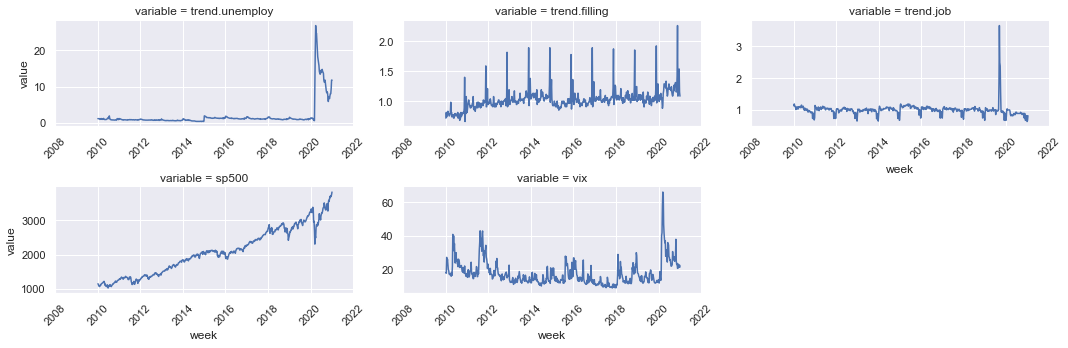

In [53]:
eda_plot.wrap_plot_ts(df, 'week', var_list)

# Weekly Trend Decomposition

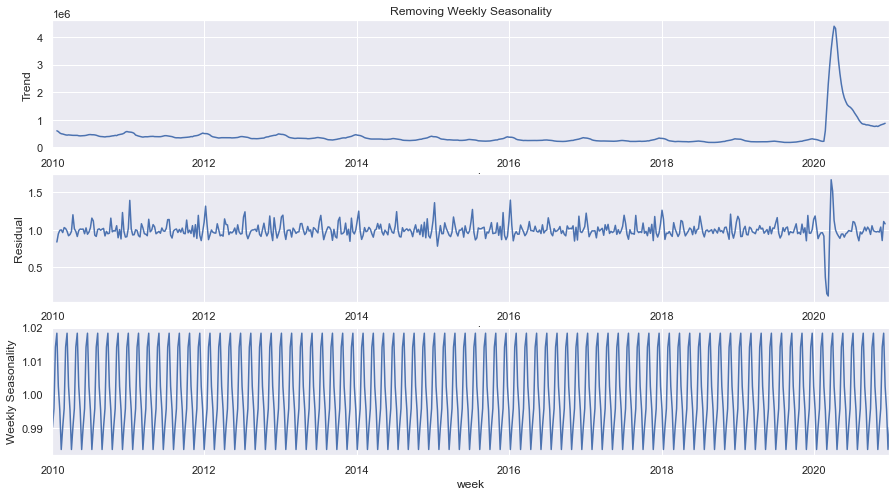

In [54]:
eda_plot.weekly_trend_decomposition(df, 'claims', 'week')